In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,8)

## Classificatie - decision trees en random forest

In [4]:
df_class = pd.DataFrame({'x' : range(1,101)}).assign(y = lambda d: np.where((d.x < 20) | (d.x > 60), 1, 0))
df_class.head()

,x,y
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


<AxesSubplot:xlabel='x', ylabel='y'>

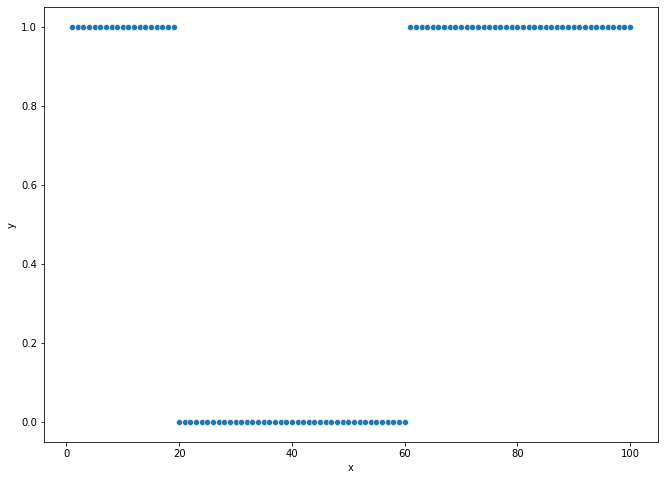

In [5]:
sns.scatterplot(x="x", y="y", data=df_class)

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [9]:
###Data berwerking - nodig indien je maar 1 variabele hebt voor X
y2 = np.array(df_class.y)
X2 = np.array(df_class.x).reshape(-1, 1)

In [10]:
dt2 = DecisionTreeClassifier().fit(X2, df_class['y'])

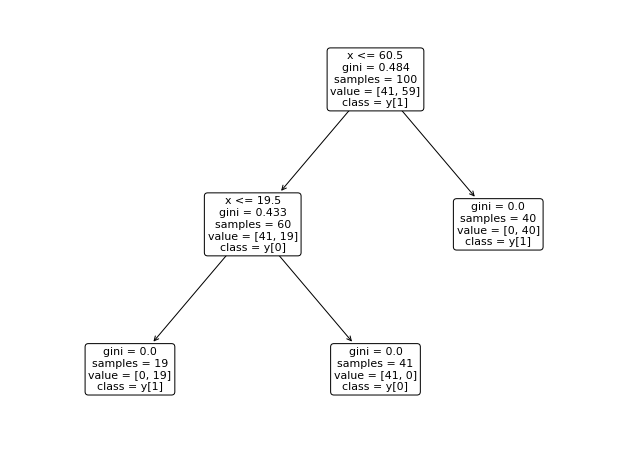

In [11]:
tree.plot_tree(dt2, fontsize=11, rounded = True, class_names = True, feature_names = "x")
fontsize=plt.show()

In [12]:
df_class['y_tree'] = dt2.predict(X2)
dt2.score(X2, y2)

1.0

<AxesSubplot:xlabel='x', ylabel='y'>

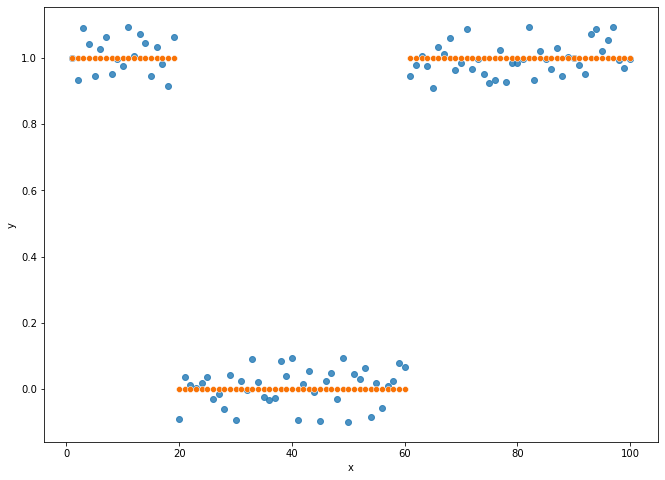

In [13]:
fig, ax = plt.subplots()
sns.regplot(x="x", y="y", data=df_class, y_jitter = 0.1, logistic = True, ax = ax, fit_reg = False)
sns.scatterplot(x = "x", y = "y_tree", data = df_class, ax = ax, color = "#f97306")

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(n_estimators=100).fit(X2, y2)

In [17]:
df_class['y_tree'] = rf.predict(X2)
rf.score(X2, y2)

1.0

<AxesSubplot:xlabel='x', ylabel='y'>

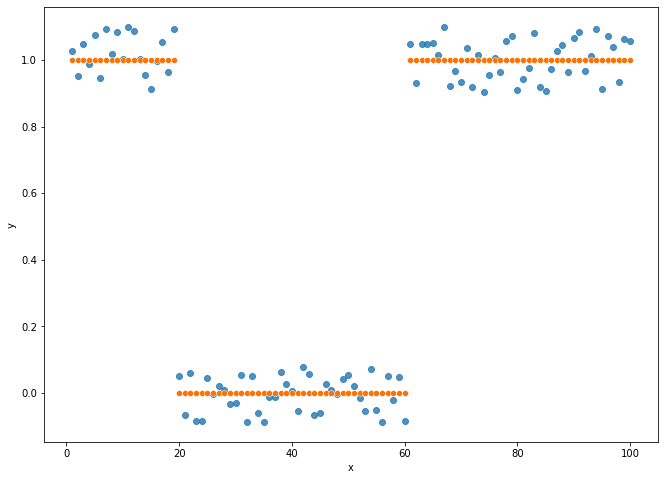

In [18]:
fig, ax = plt.subplots()
sns.regplot(x="x", y="y", data=df_class, y_jitter = 0.1, logistic = True, ax = ax, fit_reg = False)
sns.scatterplot(x = "x", y = "y_tree", data = df_class, ax = ax, color = "#f97306")

**K-Nearest Neighbour**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris = datasets.load_iris()

In [25]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
data['species'].unique()

array([0, 1, 2])

In [24]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [37]:
y_pred = neigh.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777
